# Dataset
In this notebook we'll perform tests on the SIS Dataset.

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../')

from examples.community.semantic_image_synthesis.sis_dataset import SISDataset,CELEBAHQ_DICT

img_dir_path = "/mnt/c/BUSDATA/Datasets/CelebAMask-HQ/img/"
ann_dir_path = "/mnt/c/BUSDATA/Datasets/CelebAMask-HQ/mask/"
# with
dataset = SISDataset(
        image_dir_path=img_dir_path,
        ann_dir_path=ann_dir_path,
        img_size=256,
        cls_dict=CELEBAHQ_DICT,
        nmax=100)

/home/f296849/miniconda3/Bib/envs/diffusers_dev/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 100/100 [00:01<00:00, 94.84it/s]


In [2]:
from examples.community.semantic_image_synthesis.src.pipelines.semantic_only_diffusion import SemanticOnlyDDMPipeline
from examples.community.semantic_image_synthesis.src.models.unet_2d_sis import UNet2DSISModel
from diffusers.schedulers import DDPMScheduler
import os
#model_dir_path = "/mnt/c/BUSDATA/Datasets/CelebAMask-HQ/models/256x256px/checkpoint-11000"
model_dir_path = "/mnt/c/BUSDATA/Datasets/CelebAMask-HQ/models/sis/256x256px/linear/checkpoint-95000/"

model = UNet2DSISModel.from_pretrained(os.path.join(model_dir_path,'unet'))
scheduler = DDPMScheduler(variance_type='learned_range',beta_schedule='linear')
pipeline = SemanticOnlyDDMPipeline(model,scheduler)

pipeline=pipeline.to('cuda')


100%|██████████| 50/50 [00:14<00:00,  3.43it/s]


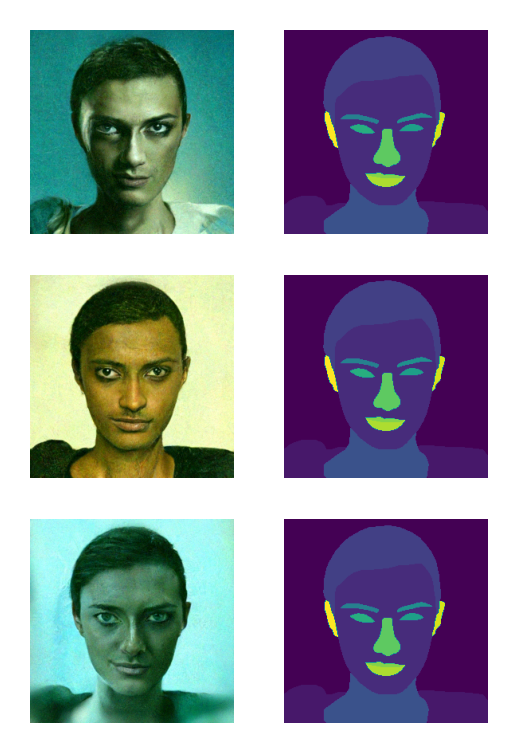

In [4]:
import torch
import matplotlib.pyplot as plt

#scheduler = DDPMScheduler(variance_type='learned_range',beta_schedule='squaredcos_cap_v2')
scheduler = DDPMScheduler(variance_type='learned_range',beta_schedule='linear',thresholding=False)
pipeline.scheduler = scheduler
x,y,name = dataset[77]
n_samples = 3
fig,ax=plt.subplots(n_samples,2,figsize=(2,n_samples),dpi=300)
generator = torch.Generator(device='cuda').manual_seed(42)
for i in range(n_samples):
    with torch.autocast(device_type="cuda",dtype=torch.float16):
        img = pipeline(segmap=torch.tensor(y).unsqueeze(0),num_inference_steps=50,generator=generator,guidance_scale=1.5)
    ax[i,0].imshow(img.images[0])
    ax[i,0].set_axis_off()
    ax[i,1].imshow(y)
    ax[i,1].set_axis_off()

plt.show()

In this try, well generate the same image with different scales...

100%|██████████| 50/50 [00:13<00:00,  3.62it/s]


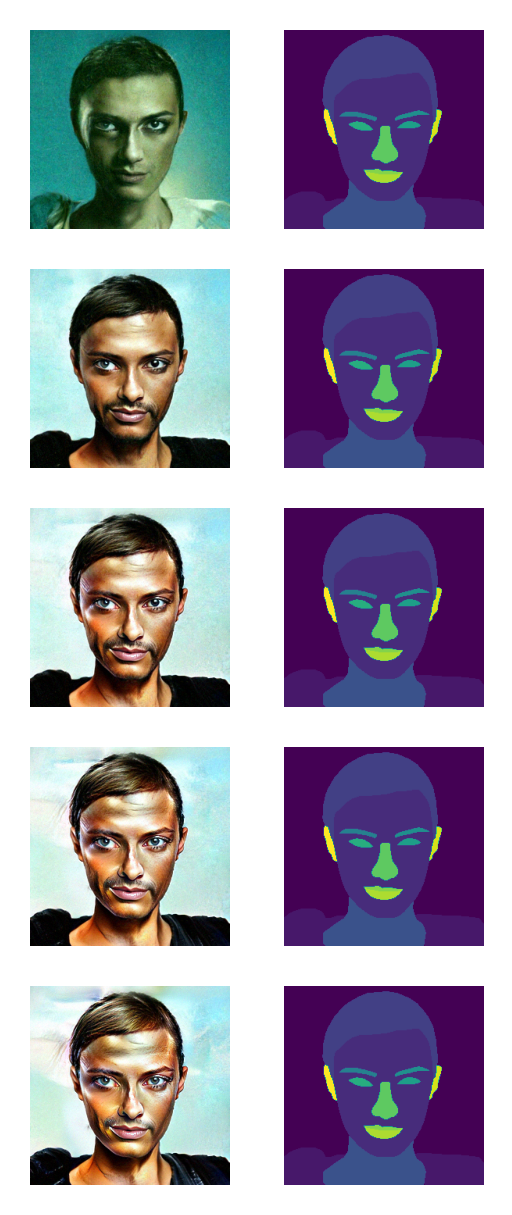

In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np

#scheduler = DDPMScheduler(variance_type='learned_range',beta_schedule='squaredcos_cap_v2')
scheduler = DDPMScheduler(variance_type='learned_range',beta_schedule='linear',thresholding=False)
pipeline.scheduler = scheduler
x,y,name = dataset[77]
n_samples = 5
fig,ax=plt.subplots(n_samples,2,figsize=(2,n_samples),dpi=300)
scale = np.linspace(1.5,10,n_samples)
for i in range(n_samples):
    generator = torch.Generator(device='cuda').manual_seed(42)
    with torch.autocast(device_type="cuda",dtype=torch.float16):
        img = pipeline(segmap=torch.tensor(y).unsqueeze(0),num_inference_steps=50,generator=generator,guidance_scale=scale[i])
    ax[i,0].imshow(img.images[0])
    ax[i,0].set_axis_off()
    ax[i,1].imshow(y)
    ax[i,1].set_axis_off()

plt.show()